<a href="https://colab.research.google.com/github/raghavkaushik/DeepLearning/blob/main/CNN_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, GlobalMaxPooling2D, Input
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cifar=tf.keras.datasets.cifar100

In [4]:
(Xtrain,Ytrain),(Xtest,Ytest)=cifar.load_data()

169017344/169001437 [==============================] - 11s 0us/step


In [7]:
#it is easiers for tf to calculate 
Xtrain,Xtest=Xtrain/255.0, Xtest/255.0
Xtrain.shape

(50000, 32, 32, 3)

In [8]:
Ytrain,Ytest=Ytrain.flatten(),Ytest.flatten()
print(Ytrain.shape)

(50000,)


In [10]:
k=len(set(Ytrain))
print("No of items in data:",k)

No of items in data: 100


In [13]:
i=Input(shape=(Xtrain[0].shape))
x=Conv2D(32,(3,3),strides=2, activation='relu')(i)
x=Conv2D(64,(3,3),strides=2, activation='relu')(x)
x=Conv2D(128,(3,3),strides=2, activation='relu')(x)
x=GlobalMaxPooling2D()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)

model=Model(i,x)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r=model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 59s 37ms/step - loss: 3.9967 - accuracy: 0.0784 - val_loss: 3.6482 - val_accuracy: 0.1372
Epoch 2/25
1563/1563 [==============================] - 55s 36ms/step - loss: 3.5314 - accuracy: 0.1537 - val_loss: 3.3426 - val_accuracy: 0.1917
Epoch 3/25
1563/1563 [==============================] - 59s 38ms/step - loss: 3.3150 - accuracy: 0.1913 - val_loss: 3.1575 - val_accuracy: 0.2324
Epoch 4/25
1563/1563 [==============================] - 60s 38ms/step - loss: 3.1628 - accuracy: 0.2190 - val_loss: 3.0718 - val_accuracy: 0.2460
Epoch 5/25
1563/1563 [==============================] - 63s 40ms/step - loss: 3.0393 - accuracy: 0.2435 - val_loss: 2.9753 - val_accuracy: 0.2637
Epoch 6/25
1563/1563 [==============================] - 56s 36ms/step - loss: 2.9359 - accuracy: 0.2656 - val_loss: 2.9206 - val_accuracy: 0.2746
Epoch 7/25
1563/1563 [==============================] - 56s 36ms/step - loss: 2.8606 - accuracy: 0.2794 - val_loss: 2.8478 -

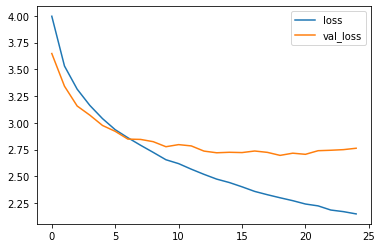

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

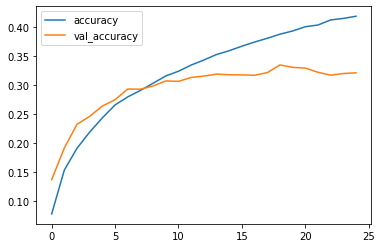

In [18]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [19]:
pred=model.predict(Xtest).argmax(axis=1)

In [20]:
print(confusion_matrix(pred,Ytest))

[[50  0  0 ...  0  0  0]
 [ 2 49  2 ...  0  2  1]
 [ 1  0 33 ...  0  6  1]
 ...
 [ 0  2  0 ... 20  0  0]
 [ 0  0  2 ...  1  9  1]
 [ 0  0  0 ...  0  0 23]]
